# Experiments with EPRL Melon extrapolation

In [1]:
# set Plot style
using Plots
using Plots.PlotMeasures
using LaTeXStrings

# set backend and style
pgfplotsx()
theme(:default)
default(
    markerstrokewidth = 0,
    markerstrokealpha = 0,
    linewidth = 2,
    grid = :true,
    gridlinewidth = 0.5,
    markersize = 5,
    tickfontsize = 22,
    size = (900, 600),
    legendfontsize = 22,
    guidefontsize = 22,
    titlefontsize = 22,
    legend = (0.03, 0.98),
    foreground_color_axis = "black",
    foreground_color_border = "black",
    foreground_color_guide = "darkorange",
    foreground_color_text = "black",
    guidefontcolor = "black",
    plot_titlefontcolor = "black",
    titlefontcolor = "black",
    shape = [:circle],
    markershape = [:circle],
)

In [2]:
using CSV, DataFrames, HalfIntegers

In [3]:
using JupyterFormatter
enable_autoformat()

1-element Vector{Function}:
 format_current_cell (generic function with 1 method)

We can extrapolate in different ways, according to the order in which we perform the summations:

$$ 
W_1 \left( K, \Delta l \right) = \sum\limits_{k}^{K} \sum\limits_{j}^{k} \sum\limits_{i} \sum\limits_{l}^{\Delta l} f \left(j, i, l \right) \ ,
$$

$$ 
W_2 \left( K, \Delta l \right) = \sum\limits_{k}^{K} \sum\limits_{j}^{k} \sum\limits_{l}^{\Delta l} \sum\limits_{i} f \left(j, i, l \right) \ ,
$$

$$ 
W_3 \left( K, \Delta l \right) = \sum\limits_{k}^{K} \sum\limits_{l}^{\Delta l} \sum\limits_{j}^{k} \sum\limits_{i} f \left(j, i, l \right) \ ,
$$

$$ 
W_4 \left( K, \Delta l \right) = \sum\limits_{l}^{\Delta l} \sum\limits_{k}^{K} \sum\limits_{j}^{k} \sum\limits_{i} f \left(j, i, l \right) \ .
$$

stai attento che detto cosi non vuol dire nulla. Ci penso con calma a come spiegarlo in maniera chiara. La somma non e' su l ma sulle shells. Nello stesso senso dei layers. Ma layers di shells.

Of course $W_1 = W_2 = W_3 = W_4$ when $\Delta l$ is fixed. However, when we extrapolate with the Aitken's delta-squared process:

$$
A_{\Delta l} \left( \infty \right) \approx \frac{A(\Delta l) A (\Delta l-2) - A^2(\Delta l-1)}{A(\Delta l) - 2A(\Delta l-1)+A(\Delta l-2)} \ ,
$$

where

$$
A \left( \Delta l \right) = \sum\limits_{l}^{\Delta l} a(l) \ ,
$$

We need to be careful about the order, since in general $W_i \neq W_j$. So far, we only extrapolated using expression $W_4$.

The purpose of this notebook is to check what happens with the melon EPRL by extrapolating using the other three possible cases.

We completely forget about Monte Carlo, since this has nothing to do with it!

Notice that:

- $W_1$ involves extrapolating *positive* and *negative* quantities
- $W_2$ involves extrapolating *positive* quantities
- $W_3$ involves extrapolating *positive* quantities
- $W_4$ involves extrapolating *positive* quantities

Should we consider an extrapolation method which gives the highest value of the amplitude for each $K$ *and* dealing only with positive quantities? I'm not sure, but it seems legitimate.

## Experiments with $\Delta l_{max} = 10$

In [4]:
DIAGRAM = "self_energy";
BASE_DATA_DIRECTORY = "../../data";
MODEL = "EPRL";

In [5]:
function get_data(filename)

    data = vec(
        Matrix(
            DataFrame(
                CSV.File(
                    "$(BASE_DATA_DIRECTORY)/$(DIAGRAM)/jb_0.5/exact/$(MODEL)/immirzi_0.1/NEW_EXTRAPOLATION/Dl_MAX_10/$(filename).csv",
                ),
            ),
        ),
    )

    data

end

get_data (generic function with 1 method)

In [6]:
W_Dl = get_data("Dl_cutoff_10")
W_Dl_m1 = get_data("Dlm1_cutoff_10")
W_Dl_m2 = get_data("Dlm2_cutoff_10")

W_1 = get_data("W1_cutoff_10")
W_2 = get_data("W2_cutoff_10")
W_3_10_shell = get_data("W3_cutoff_10")
W_4_10_shell = get_data("W4_cutoff_10");

Let's plot $W_2, W_3, W_4$ along with the amplitudes computed at finite $\Delta l$

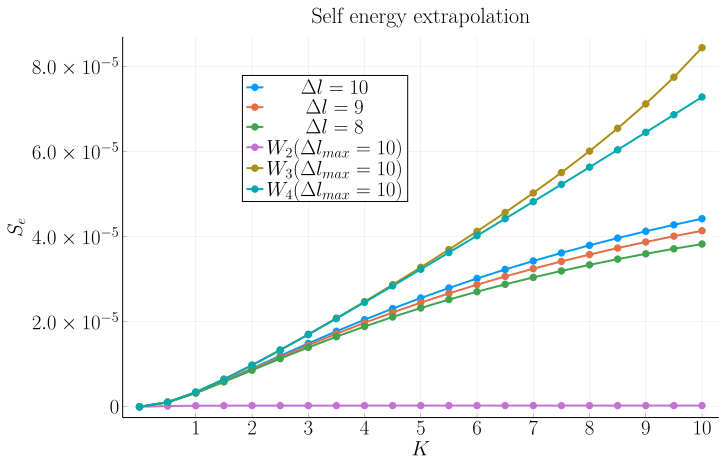

In [7]:
plotib0 = plot(
    0.0:0.5:10,
    [W_Dl[:], W_Dl_m1[:], W_Dl_m2[:], W_2[:], W_3_10_shell[:], W_4_10_shell[:]],
    label = [L"\Delta l = 10" L"\Delta l = 9" L"\Delta l = 8" L"W_2  (\Delta l_{max} = 10)" L"W_3  (\Delta l_{max} = 10)" L"W_4  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.2, 0.9),
)

$W_1$ is plotted below. It is extremely irregular and suspicious. I think this is an artifact of the extrapolation, as we are dealing with both positive and negative quantities. 

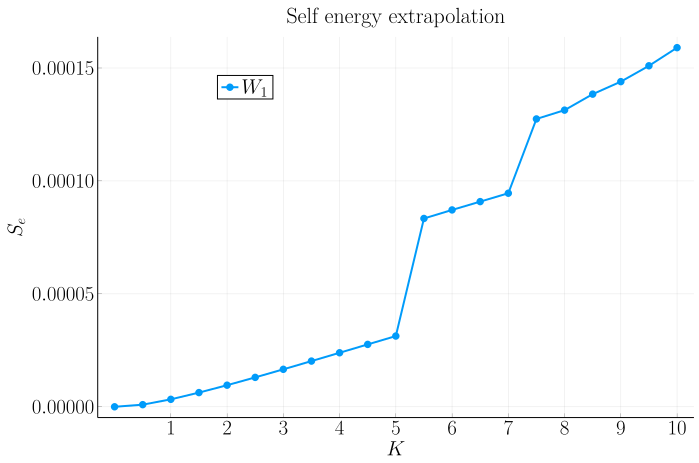

In [8]:
plotib0 = plot(
    0.0:0.5:10,
    [W_1[:]],
    label = [L"W_1"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.2, 0.9),
)

### Conclusions

I ignore $W_1$ as I (strongly) don't believe it is a good extrapolation. So far, $W_3$ seems to me the best extrapolation. This seems to suggests that the EPRL melon is "less linear" than we thought. It seems closer to a quadratic divergence... but is it really so?

## Experiments with $\Delta l_{max} = 20$

We previously computed the EPRL melon up to $\Delta l=20$. We can use these data to push and improve our analysis. 

We can't know $W_1$ and $W_4$ for $\Delta l = 20$, but $W_3$ and $W_4$ yes! 

Let's plot $W_4$ and $W_3$ for $\Delta l = 20$

In [9]:
data_20_shell = Matrix(DataFrame(CSV.File("Divergences_table_imm_0.1_20_SHELLS.csv")));

In [10]:
# amplitudes at finite Dl

Dl_20_shell = zeros(21)
Dl_19_shell = zeros(21)
Dl_18_shell = zeros(21)

Dl_20_shell[1] = 0.0
Dl_19_shell[1] = 0.0
Dl_18_shell[1] = 0.0

Dl_20_shell[2:end] = data_20_shell[:, 21]
Dl_19_shell[2:end] = data_20_shell[:, 20]
Dl_18_shell[2:end] = data_20_shell[:, 19]

# difference of amplitudes at finite Dl

Diff_20_shell = zeros(21)
Diff_19_shell = zeros(21)
Diff_18_shell = zeros(21)

Diff_20_shell[1] = 0.0
Diff_19_shell[1] = 0.0
Diff_18_shell[1] = 0.0

Diff_20_shell[2] = data_20_shell[1, 21]
Diff_19_shell[2] = data_20_shell[1, 20]
Diff_18_shell[2] = data_20_shell[1, 19]

Diff_20_shell[3:end] = [data_20_shell[id, 21] - data_20_shell[id-1, 21] for id = 2:20]
Diff_19_shell[3:end] = [data_20_shell[id, 20] - data_20_shell[id-1, 20] for id = 2:20]
Diff_18_shell[3:end] = [data_20_shell[id, 19] - data_20_shell[id-1, 19] for id = 2:20];

W_3_20_shell_difference = zeros(21)

W_3_20_shell_difference .= (
    (Diff_20_shell[:] .* Diff_18_shell[:] .- Diff_19_shell[:] .^ 2) ./
    (Diff_20_shell[:] .- 2 .* Diff_19_shell[:] .+ Diff_18_shell[:])
);

W_3_20_shell_difference[1] = 0.0;

W_3_20_shell = zeros(21)

for k = 1:21
    W_3_20_shell[k] = sum(W_3_20_shell_difference[1:k])
end

In [11]:
W_4_20_shell = zeros(21)

W_4_20_shell[1] = 0.0

W_4_20_shell[2:end] .= (
    (data_20_shell[:, end] .* data_20_shell[:, end-2] .- data_20_shell[:, end-1] .^ 2) ./
    (data_20_shell[:, end] .- 2 .* data_20_shell[:, end-1] .+ data_20_shell[:, end-2])
);

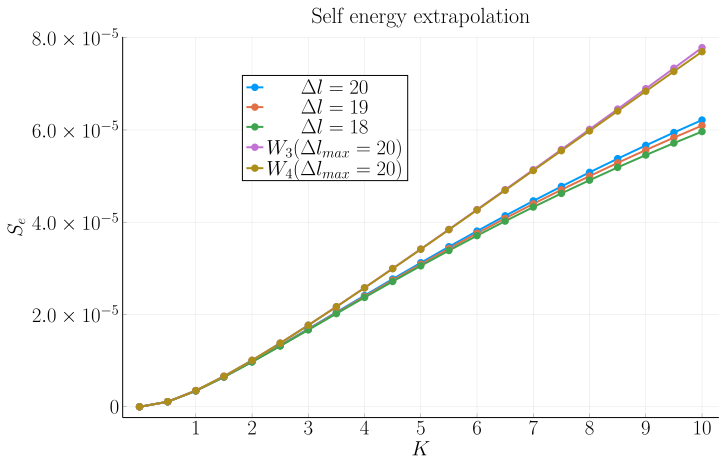

In [12]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], Dl_19_shell[:], Dl_18_shell[:], W_3_20_shell[:], W_4_20_shell[:]],
    label = [L"\Delta l = 20" L"\Delta l = 19" L"\Delta l = 18" L"W_3 (\Delta l_{max} = 20)" L"W_4 (\Delta l_{max} = 20)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.2, 0.9),
)

### Conclusions

For $\Delta l = 20$, the difference between $W_3$ and $W_4$ is almost zero!

*Crucially*, notice that $W_3 (\Delta l_{max}=10) > W_3 (\Delta l_{max}=20)$. In other words, $W_3$ **overestimates**! Instead, $W_4 (\Delta l_{max}=10) < W_4 (\Delta l_{max}=20)$, as we expect.

If we had limited our analysis up to $\Delta l=10$, concluding *the self-energy divergence is faster than linear* by looking at $W_3$, we would have goofed off!

**I think $W_4$ is the safest and most convenient choice for multiple reasons**. Hopefully we can discuss it soon!

### Consistency check

Let's derive $W_3 (\Delta l_{max} = 10)$ from the data obtained one year ago, and compare it with the data just computed

In [13]:
Diff_10_shell = zeros(21)
Diff_9_shell = zeros(21)
Diff_8_shell = zeros(21)

Diff_10_shell[1] = 0.0
Diff_9_shell[1] = 0.0
Diff_8_shell[1] = 0.0

Diff_10_shell[2] = data_20_shell[1, 11]
Diff_9_shell[2] = data_20_shell[1, 10]
Diff_8_shell[2] = data_20_shell[1, 9]

Diff_10_shell[3:end] = [data_20_shell[id, 11] - data_20_shell[id-1, 11] for id = 2:20]
Diff_9_shell[3:end] = [data_20_shell[id, 10] - data_20_shell[id-1, 10] for id = 2:20]
Diff_8_shell[3:end] = [data_20_shell[id, 9] - data_20_shell[id-1, 9] for id = 2:20];

W_3_10_shell_difference = zeros(21)

W_3_10_shell_difference .= (
    (Diff_10_shell[:] .* Diff_8_shell[:] .- Diff_9_shell[:] .^ 2) ./
    (Diff_10_shell[:] .- 2 .* Diff_9_shell[:] .+ Diff_8_shell[:])
);

W_3_10_shell_difference[1] = 0.0;

W_3_10_shell_check = zeros(21)

for k = 1:21
    W_3_10_shell_check[k] = sum(W_3_10_shell_difference[1:k])
end

In [14]:
W_3_10_shell

21-element Vector{Float64}:
 0.0
 1.0901759030542612e-6
 3.4528316701686723e-6
 6.468383686699478e-6
 9.789138087622555e-6
 1.3340845215064948e-5
 1.7024365989850756e-5
 2.082858930741236e-5
 2.4718744616975507e-5
 2.8702855093185208e-5
 3.2772925157052025e-5
 3.6947260874399994e-5
 4.1233864543315094e-5
 4.56607058346141e-5
 5.025041081412054e-5
 5.5044844860611284e-5
 6.008672594666879e-5
 6.544319325871016e-5
 7.119381530067331e-5
 7.745998134569307e-5
 8.440583935343858e-5

In [15]:
W_3_10_shell_check

21-element Vector{Float64}:
 0.0
 1.0901759030541198e-6
 3.4528316701689705e-6
 6.468383686699986e-6
 9.789138087623202e-6
 1.334084521506543e-5
 1.7024365989851108e-5
 2.082858930741271e-5
 2.4718744616975822e-5
 2.8702855093185228e-5
 3.27729251570518e-5
 3.694726087439983e-5
 4.1233864543314234e-5
 4.5660705834614253e-5
 5.025041081412103e-5
 5.504484486061408e-5
 6.008672594667387e-5
 6.544319325871059e-5
 7.119381530067813e-5
 7.745998134569364e-5
 8.440583935344484e-5

check passed!

Let's put everything in a single plot

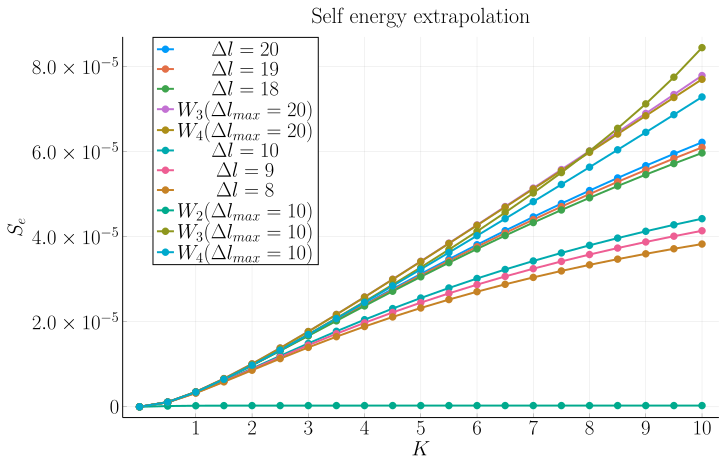

In [17]:
plotib0 = plot(
    0.0:0.5:10,
    [
        Dl_20_shell[:],
        Dl_19_shell[:],
        Dl_18_shell[:],
        W_3_20_shell[:],
        W_4_20_shell[:],
        W_Dl[:],
        W_Dl_m1[:],
        W_Dl_m2[:],
        W_2[:],
        W_3_10_shell[:],
        W_4_10_shell[:],
    ],
    label = [L"\Delta l = 20" L"\Delta l = 19" L"\Delta l = 18" L"W_3 (\Delta l_{max} = 20)" L"W_4 (\Delta l_{max} = 20)" L"\Delta l = 10" L"\Delta l = 9" L"\Delta l = 8" L"W_2  (\Delta l_{max} = 10)" L"W_3  (\Delta l_{max} = 10)" L"W_4  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [28]:
W_3_10_shell_check

21-element Vector{Float64}:
 0.0
 1.0901759030541198e-6
 3.4528316701689705e-6
 6.468383686699986e-6
 9.789138087623202e-6
 1.334084521506543e-5
 1.7024365989851108e-5
 2.082858930741271e-5
 2.4718744616975822e-5
 2.8702855093185228e-5
 3.27729251570518e-5
 3.694726087439983e-5
 4.1233864543314234e-5
 4.5660705834614253e-5
 5.025041081412103e-5
 5.504484486061408e-5
 6.008672594667387e-5
 6.544319325871059e-5
 7.119381530067813e-5
 7.745998134569364e-5
 8.440583935344484e-5

In [20]:
W_3_10_shell

21-element Vector{Float64}:
 0.0
 1.0901759030542612e-6
 3.4528316701686723e-6
 6.468383686699478e-6
 9.789138087622555e-6
 1.3340845215064948e-5
 1.7024365989850756e-5
 2.082858930741236e-5
 2.4718744616975507e-5
 2.8702855093185208e-5
 3.2772925157052025e-5
 3.6947260874399994e-5
 4.1233864543315094e-5
 4.56607058346141e-5
 5.025041081412054e-5
 5.5044844860611284e-5
 6.008672594666879e-5
 6.544319325871016e-5
 7.119381530067331e-5
 7.745998134569307e-5
 8.440583935343858e-5

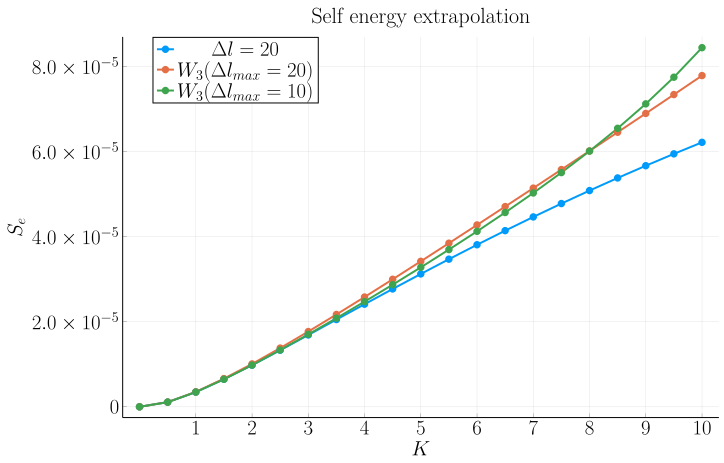

In [21]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], W_3_20_shell[:], W_3_10_shell[:]],
    label = [L"\Delta l = 20" L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

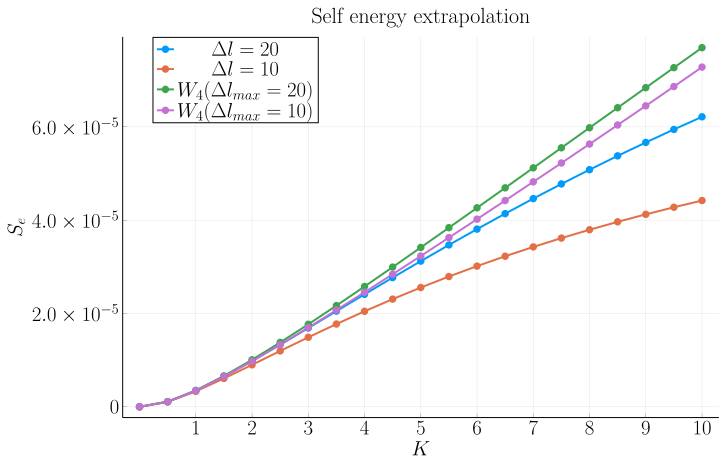

In [24]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], W_Dl, W_4_20_shell[:], W_4_10_shell[:]],
    label = [L"\Delta l = 20" L"\Delta l = 10" L"W_4 (\Delta l_{max} = 20)" L"W_4  (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [26]:
Diff_15_shell = zeros(21)
Diff_14_shell = zeros(21)
Diff_13_shell = zeros(21)

Diff_15_shell[1] = 0.0
Diff_14_shell[1] = 0.0
Diff_13_shell[1] = 0.0

Diff_15_shell[2] = data_20_shell[1, 16]
Diff_14_shell[2] = data_20_shell[1, 15]
Diff_13_shell[2] = data_20_shell[1, 14]

Diff_15_shell[3:end] = [data_20_shell[id, 16] - data_20_shell[id-1, 16] for id = 2:20]
Diff_14_shell[3:end] = [data_20_shell[id, 15] - data_20_shell[id-1, 15] for id = 2:20]
Diff_13_shell[3:end] = [data_20_shell[id, 14] - data_20_shell[id-1, 14] for id = 2:20];

W_3_15_shell_difference = zeros(21)

W_3_15_shell_difference .= (
    (Diff_15_shell[:] .* Diff_13_shell[:] .- Diff_14_shell[:] .^ 2) ./
    (Diff_15_shell[:] .- 2 .* Diff_14_shell[:] .+ Diff_13_shell[:])
);

W_3_15_shell_difference[1] = 0.0;

W_3_15_shell = zeros(21)

for k = 1:21
    W_3_15_shell[k] = sum(W_3_15_shell_difference[1:k])
end

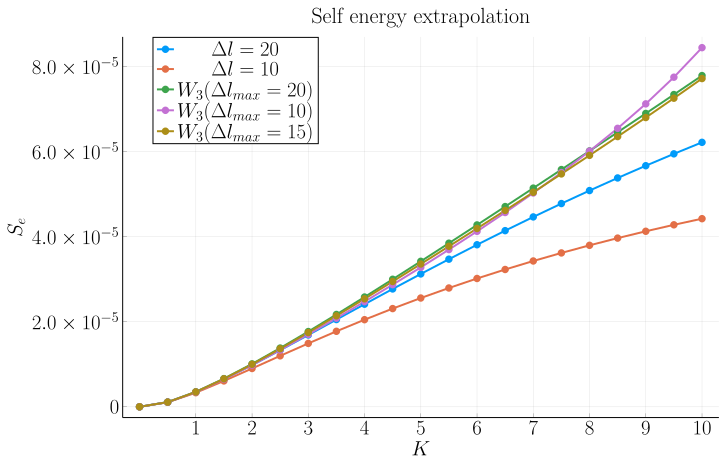

In [27]:
plotib0 = plot(
    0.0:0.5:10,
    [Dl_20_shell[:], W_Dl, W_3_20_shell[:], W_3_10_shell[:], W_3_15_shell[:]],
    label = [L"\Delta l = 20" L"\Delta l = 10" L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 10)" L"W_3  (\Delta l_{max} = 15)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)

In [29]:
Diff_12_shell = zeros(21)
Diff_11_shell = zeros(21)
Diff_10_shell = zeros(21)

Diff_12_shell[1] = 0.0
Diff_11_shell[1] = 0.0
Diff_10_shell[1] = 0.0

Diff_12_shell[2] = data_20_shell[1, 13]
Diff_11_shell[2] = data_20_shell[1, 12]
Diff_10_shell[2] = data_20_shell[1, 11]

Diff_12_shell[3:end] = [data_20_shell[id, 13] - data_20_shell[id-1, 13] for id = 2:20]
Diff_11_shell[3:end] = [data_20_shell[id, 12] - data_20_shell[id-1, 12] for id = 2:20]
Diff_10_shell[3:end] = [data_20_shell[id, 11] - data_20_shell[id-1, 11] for id = 2:20];

W_3_12_shell_difference = zeros(21)

W_3_12_shell_difference .= (
    (Diff_12_shell[:] .* Diff_10_shell[:] .- Diff_11_shell[:] .^ 2) ./
    (Diff_12_shell[:] .- 2 .* Diff_11_shell[:] .+ Diff_10_shell[:])
);

W_3_12_shell_difference[1] = 0.0;

W_3_12_shell = zeros(21)

for k = 1:21
    W_3_12_shell[k] = sum(W_3_12_shell_difference[1:k])
end

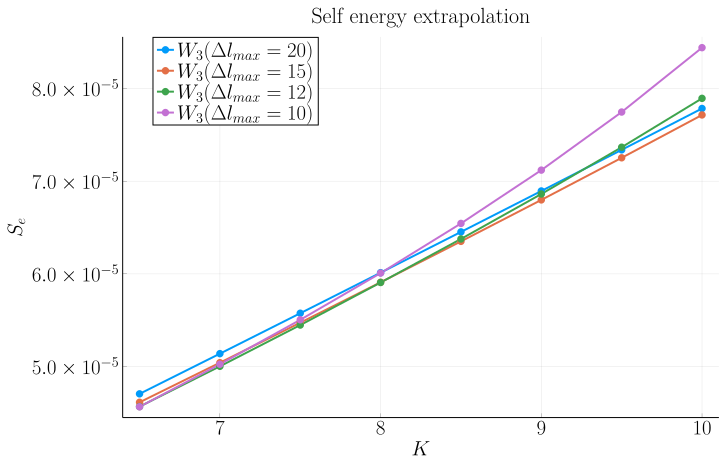

In [32]:
plotib0 = plot(
    6.5:0.5:10,
    [
        W_3_20_shell[14:end],
        W_3_15_shell[14:end],
        W_3_12_shell[14:end],
        W_3_10_shell[14:end],
    ],
    label = [L"W_3 (\Delta l_{max} = 20)" L"W_3  (\Delta l_{max} = 15)" L"W_3  (\Delta l_{max} = 12)" L"W_3 (\Delta l_{max} = 10)"],
    xlabel = L"K",
    ylabel = L"S_e",
    title = ["Self energy extrapolation"],
    markershape = [:circle :circle :circle],
    shape = [:circle :circle :circle],
    xticks = 1:1:10,
    legend = (0.05, 1),
)